# Visualise GRACE data:

In [1]:
import matplotlib.pyplot as plt
import torch

from grace.models.datasets import dataset_from_graph
from grace.models.feature_extractor import FeatureExtractor
from grace.visualisation.subgraph import plot_subgraph_geometry

from grace.io.image_dataset import ImageGraphDataset
from grace.evaluation.process import generate_ground_truth_graph
from grace.visualisation.plotting import (
    display_image_and_grace_annotation, 
    read_patch_stack_by_label, 
    montage_from_image_patches, 
    overlay_from_image_patches,
    plot_simple_graph,
    plot_connected_components
)

/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Visualise the overlay of annotated graph on image annotation mask:

In [3]:
bbox_size = (224, 224)
extractor_filename = "/Users/kulicna/Desktop/classifier/extractor/resnet152.pt"
pre_trained_resnet = torch.load(extractor_filename)
feature_extractor = FeatureExtractor(model=pre_trained_resnet, bbox_size=bbox_size)


In [4]:
grace_path = "/Users/kulicna/Desktop/dataset/shape_stars/infer"
dataset = ImageGraphDataset(
    image_dir=grace_path, 
    grace_dir=grace_path, 
    transform=feature_extractor,
)
image, graph_data = dataset[0]
graph = graph_data["graph"]
graph.number_of_nodes(), graph.number_of_edges()


09/18/2023 06:23:45 PM MRC_Synthetic_File_006
09/18/2023 06:23:45 PM Nodes count | [56, 96, 37] x | [29.63, 50.79, 19.58] %
09/18/2023 06:23:45 PM Edges count | [246, 111, 195] x | [44.57, 20.11, 35.33] %
09/18/2023 06:23:45 PM Relabelled 'Annotation.UNKNOWN'
09/18/2023 06:23:45 PM Nodes count | [93, 96, 0] x | [49.21, 50.79, 0.0] %
09/18/2023 06:23:45 PM Edges count | [441, 111, 0] x | [79.89, 20.11, 0.0] %
/Users/kulicna/anaconda3/envs/grace-environment/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialia

(189, 552)

### Generate ground truth graph:

In [5]:
gt_graph = generate_ground_truth_graph(graph)
gt_graph.number_of_nodes(), gt_graph.number_of_edges()


(189, 111)

### Display the annotation:

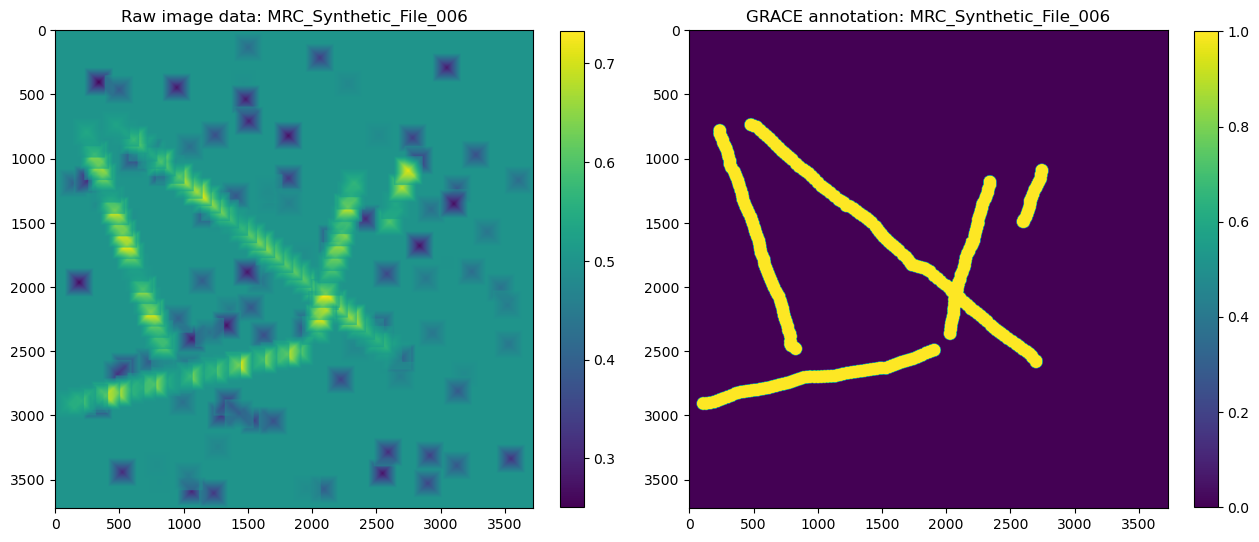

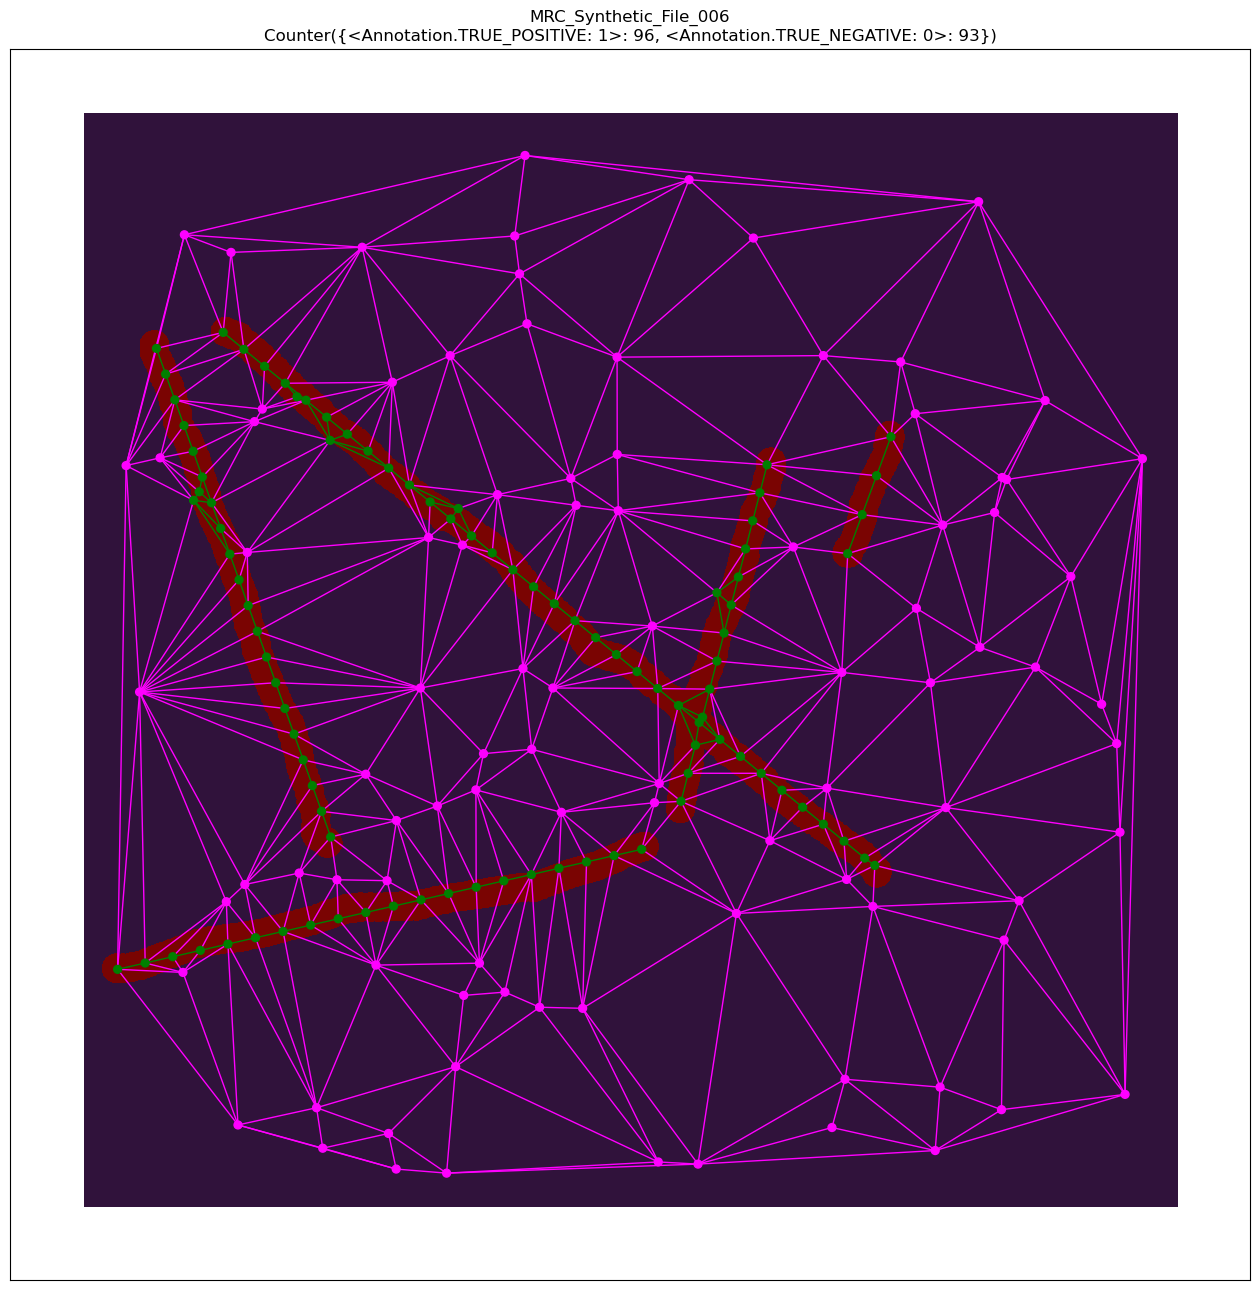

In [6]:
display_image_and_grace_annotation(image=image, target=graph_data)

### Visualise the crops montages & overlay:

In [7]:
crops = read_patch_stack_by_label(G=graph_data["graph"], image=image, crop_shape=bbox_size)
[len(c) for c in crops]

[93, 96, 0]

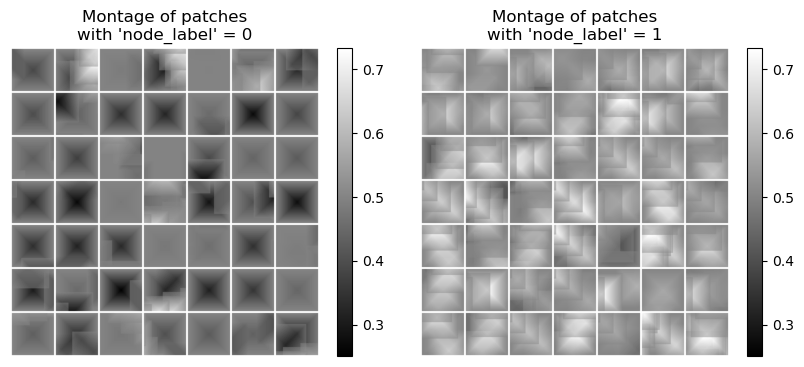

In [8]:
montage_from_image_patches(crops)

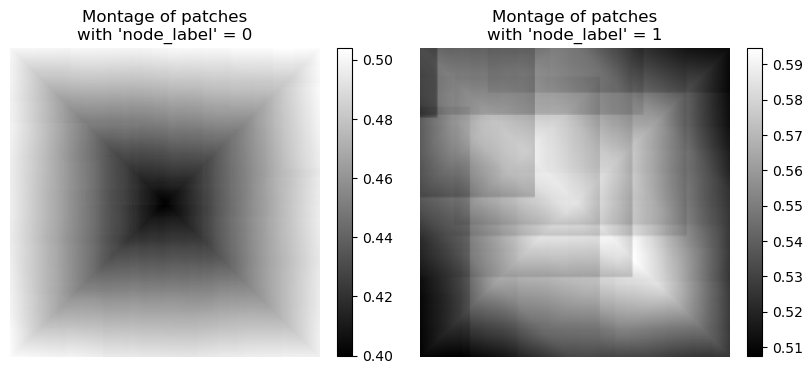

In [9]:
overlay_from_image_patches(crops)

### Draw the plain graphs:

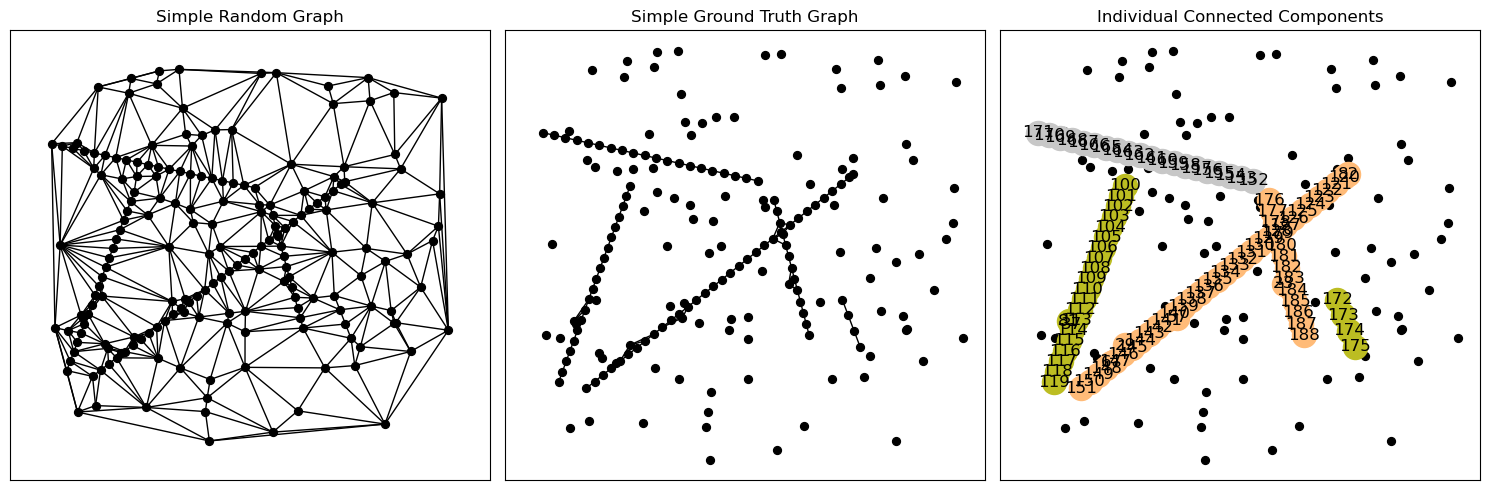

In [10]:
shape = 5
_, axes = plt.subplots(1, 3, figsize=(shape*3, shape*1))

plot_simple_graph(graph, title=f"Simple Random Graph", ax=axes[0])
plot_simple_graph(gt_graph, title=f"Simple Ground Truth Graph", ax=axes[1])
plot_connected_components(gt_graph, title=f"Individual Connected Components", ax=axes[2])

plt.tight_layout()
plt.show()


### Visualise few subgraphs:

In [12]:
dataset = dataset_from_graph(graph, mode='sub', in_train_mode=True)
len(dataset), type(dataset[0])

(189, torch_geometric.data.data.Data)

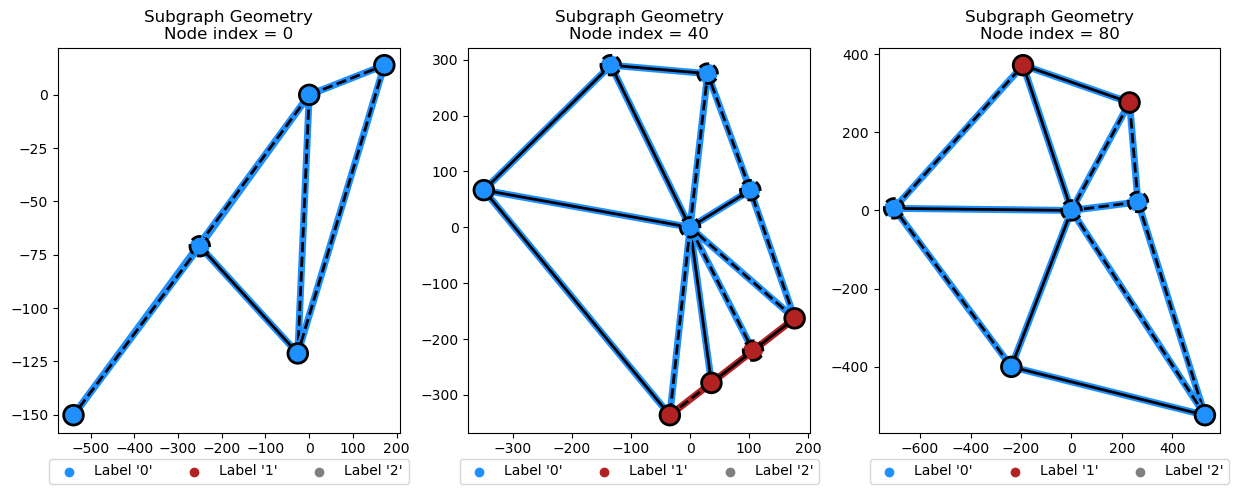

In [17]:
ncols = 3
_, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
    
for sub in range(ncols):
    sub_graph = dataset[sub*40]
    plot_subgraph_geometry(sub_graph, title=f"Node index = {sub*40}", ax=axes[sub])

##### Done!